In [4]:
import librosa
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Function to load in the spectrogram of each audio file
def file_loader(file_name):
    X, sample_rate = librosa.load(file_name, duration=2.97)
    ps = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    return ps

In [6]:
# load in all rows all sample information from dataset
df = pd.read_csv("train/train.csv") 

In [7]:
# create a unique list of all audio sound choices
catalog = df['Class'].unique().tolist()
catalog = [i for i in enumerate(catalog)]
catalog

[(0, 'siren'),
 (1, 'street_music'),
 (2, 'drilling'),
 (3, 'dog_bark'),
 (4, 'children_playing'),
 (5, 'gun_shot'),
 (6, 'engine_idling'),
 (7, 'air_conditioner'),
 (8, 'jackhammer'),
 (9, 'car_horn')]

In [8]:
# create an array for "Y"
labels = np.empty(0)
# create list of arrays for "X"
transformed_samples = []
# pull through the data and load each file
for i in range(df.shape[0]):
    number = df.iloc[i,0]
    label = df.iloc[i,1]
    filename = f'{number}.wav'
    lbl = f'{label}'
    try:
        ps = file_loader(f'train/train/{filename}')
        if ps.shape != (128, 128): continue
    except:
        print(f"File {filename} didn't work")
        continue
    transformed_samples.append(np.reshape(ps, -1))
    #load in the labels into Y by number
    if label == catalog[0][1]:
        labels = np.append(labels, catalog[0][0])
    elif label == catalog[1][1]:
        labels = np.append(labels, catalog[1][0])
    elif label == catalog[2][1]:
        labels = np.append(labels, catalog[2][0])
    elif label == catalog[3][1]:
        labels = np.append(labels, catalog[3][0])
    elif label == catalog[4][1]:
        labels = np.append(labels, catalog[4][0])
    elif label == catalog[5][1]:
        labels = np.append(labels, catalog[5][0])
    elif label == catalog[6][1]:
        labels = np.append(labels, catalog[6][0])
    elif label == catalog[7][1]:
        labels = np.append(labels, catalog[7][0])
    elif label == catalog[8][1]:
        labels = np.append(labels, catalog[8][0])
    elif label == catalog[9][1]:
        labels = np.append(labels, catalog[9][0])
    

In [9]:
# put transformed_samples into dataframe
df_1 = pd.DataFrame(transformed_samples)
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,9.912633,12.610701,9.300829,3.297573,4.655068,5.044219,1.048530,1.559219,1.782135,8.640504,...,4.685921e-06,7.909435e-06,9.165550e-06,6.099369e-06,6.530995e-06,5.510310e-06,5.303133e-06,7.210522e-06,5.260210e-06,0.000420
1,2.661400,4.117083,1.679421,1.527544,1.595737,2.088292,6.244799,2.845641,0.872873,0.603950,...,9.428515e-05,4.775995e-05,4.399524e-05,1.374228e-05,8.436620e-06,7.757358e-06,1.799225e-05,1.284928e-04,2.856303e-04,0.007425
2,0.005557,0.004293,0.002716,0.002533,0.006898,0.006982,0.005634,0.007432,0.014744,0.015015,...,2.457749e-03,2.147882e-03,2.373022e-03,2.072116e-03,2.920827e-03,2.892467e-03,2.193557e-03,3.515167e-03,7.447198e-03,0.010343
3,0.353371,0.096338,0.003695,0.004806,0.004052,0.013310,0.013695,0.020970,0.015848,0.021949,...,1.214701e-09,2.546348e-10,7.933098e-11,2.247661e-10,4.596068e-10,2.116015e-10,7.314918e-11,1.394108e-10,4.291821e-08,0.000476
4,166.046129,102.582782,34.110469,51.670868,44.564469,57.289162,119.480505,65.250017,64.334011,80.964602,...,3.375942e-07,2.726756e-07,4.011556e-07,4.404903e-07,4.052210e-07,5.836523e-07,5.716864e-07,4.060787e-07,5.430899e-07,0.000350


In [57]:
# add the Labels into the dataframe
df_1["Y"] = labels
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Y
0,9.912633,12.610701,9.300829,3.297573,4.655068,5.044219,1.048530,1.559219,1.782135,8.640504,...,7.909435e-06,9.165550e-06,6.099369e-06,6.530995e-06,5.510310e-06,5.303133e-06,7.210522e-06,5.260210e-06,0.000420,0.0
1,2.661400,4.117083,1.679421,1.527544,1.595737,2.088292,6.244799,2.845641,0.872873,0.603950,...,4.775995e-05,4.399524e-05,1.374228e-05,8.436620e-06,7.757358e-06,1.799225e-05,1.284928e-04,2.856303e-04,0.007425,1.0
2,0.005557,0.004293,0.002716,0.002533,0.006898,0.006982,0.005634,0.007432,0.014744,0.015015,...,2.147882e-03,2.373022e-03,2.072116e-03,2.920827e-03,2.892467e-03,2.193557e-03,3.515167e-03,7.447198e-03,0.010343,2.0
3,0.353371,0.096338,0.003695,0.004806,0.004052,0.013310,0.013695,0.020970,0.015848,0.021949,...,2.546348e-10,7.933098e-11,2.247661e-10,4.596068e-10,2.116015e-10,7.314918e-11,1.394108e-10,4.291821e-08,0.000476,0.0
4,166.046129,102.582782,34.110469,51.670868,44.564469,57.289162,119.480505,65.250017,64.334011,80.964602,...,2.726756e-07,4.011556e-07,4.404903e-07,4.052210e-07,5.836523e-07,5.716864e-07,4.060787e-07,5.430899e-07,0.000350,3.0


In [11]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(df_1.drop("Y", axis=1), df_1["Y"], random_state=1)


In [12]:
# Always scale your data

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# set up random forest
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7782571182053495

In [14]:
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in rf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')


Average number of nodes 1115
Average maximum depth 21


In [15]:
from sklearn.tree import export_graphviz
import pydot
rf = rf.fit(X_train, y_train)
export_graphviz(rf.estimators_[0], out_file='tree_from_forest.dot')
(graph,) = pydot.graph_from_dot_file('tree_from_forest.dot')
graph.write_png('tree_from_forest.png')

from IPython.display import Image
Image(filename = 'tree_from_forest.png')

In [55]:
# drop in single example to see prediction
predictions = rf.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True).head()

,Prediction,Actual
0,2.0,2.0
1,1.0,4.0
2,2.0,9.0
3,1.0,3.0
4,0.0,0.0


In [17]:
from sklearn.metrics import confusion_matrix
thing = confusion_matrix(y_test, predictions)
thing

thing = thing.astype('float') / thing.sum(axis=1)[:, np.newaxis]

thing

array([[0.82165605, 0.01273885, 0.        , 0.04458599, 0.05095541,
        0.        , 0.00636943, 0.01273885, 0.05095541, 0.        ],
       [0.00689655, 0.5862069 , 0.02758621, 0.02758621, 0.2       ,
        0.        , 0.04137931, 0.04827586, 0.06206897, 0.        ],
       [0.        , 0.03846154, 0.80769231, 0.        , 0.08461538,
        0.        , 0.02307692, 0.        , 0.04615385, 0.        ],
       [0.06315789, 0.11578947, 0.01052632, 0.58947368, 0.12631579,
        0.        , 0.03157895, 0.06315789, 0.        , 0.        ],
       [0.01398601, 0.18181818, 0.02797203, 0.06993007, 0.59440559,
        0.        , 0.00699301, 0.05594406, 0.04895105, 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.02797203, 0.01398601, 0.        , 0.        , 0.00699301,
        0.        , 0.93006993, 0.02097902, 0.        , 0.        ],
       [0.        , 0.01840491, 0.       

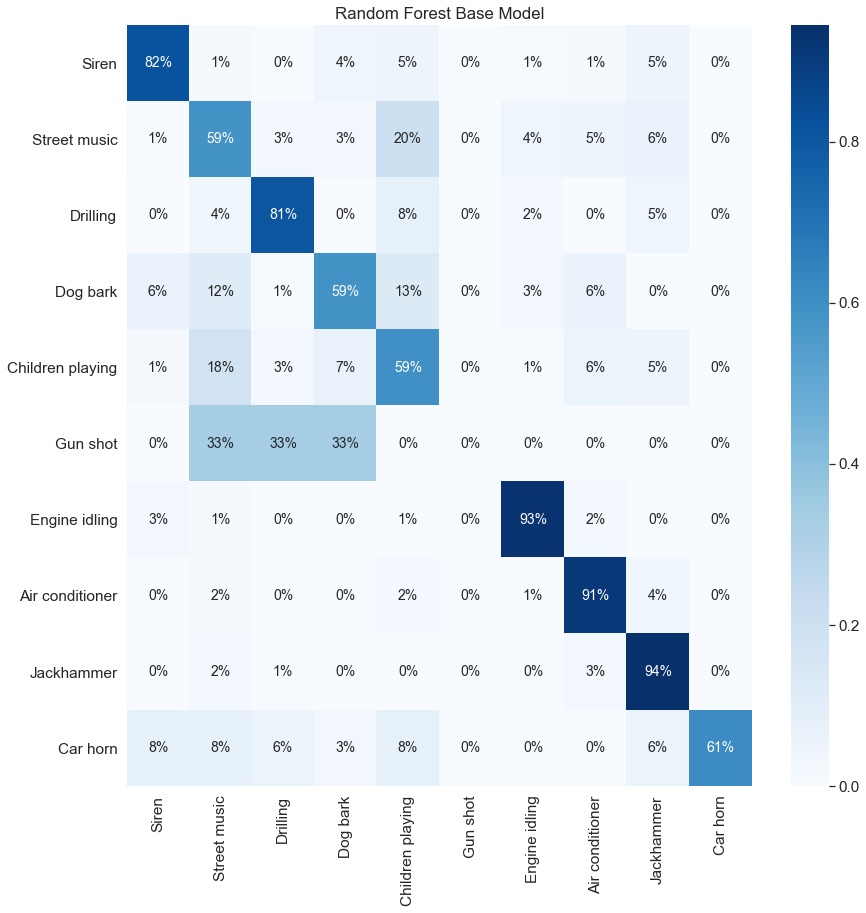

In [51]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(thing, index = [i[1].replace('_', ' ').capitalize() for i in catalog],
                  columns = [i[1].replace('_', ' ').capitalize() for i in catalog])

sn.set(font_scale=1.4)#for label size
plt.figure(figsize = (14,14))
plt.title('Random Forest Base Model')
sn.heatmap(df_cm, annot=True,cmap='Blues',annot_kws={"size": 14}, fmt='.0%')# font size
plt.savefig('heatmap.png')

In [19]:
#from sklearn.ensemble import RandomForestClassifier
#rf_1 = RandomForestClassifier(random_state = 1)
#from pprint import pprint
# Look at parameters used by our current forest
#print('Parameters currently in use:\n')
#pprint(rf_1.get_params())
 

In [20]:
#from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(90, 120, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}
#pprint(random_grid)

In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf_1 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf_1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)

In [22]:
#rf_random.best_params_

In [29]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15, 20, 25],
  #  'max_features': [2, 3],
  #  'min_samples_leaf': [3, 4, 5],
  #  'min_samples_split': [10, 12],
    'n_estimators': [200, 500, 1000, 1500, 2000]
}
# Create a based model
rf_1 = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 102.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15, 20, 25], 'n_estimators': [200, 500, 1000, 1500, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [30]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 25, 'n_estimators': 2000}

In [25]:
from sklearn import metrics
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
 #   mape = 100 * np.mean(errors / y_test)
 #   accuracy = 100 - mape
    accuracy = metrics.accuracy_score(y_test, predictions) * 100
    counter = metrics.accuracy_score(y_test, predictions, normalize=False)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Correctly Classified: {}.'.format(counter))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 200, random_state = 1)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.7429 degrees.
Accuracy = 78.08%.
Correctly Classified: 905.


In [31]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.7558 degrees.
Accuracy = 78.26%.
Correctly Classified: 907.


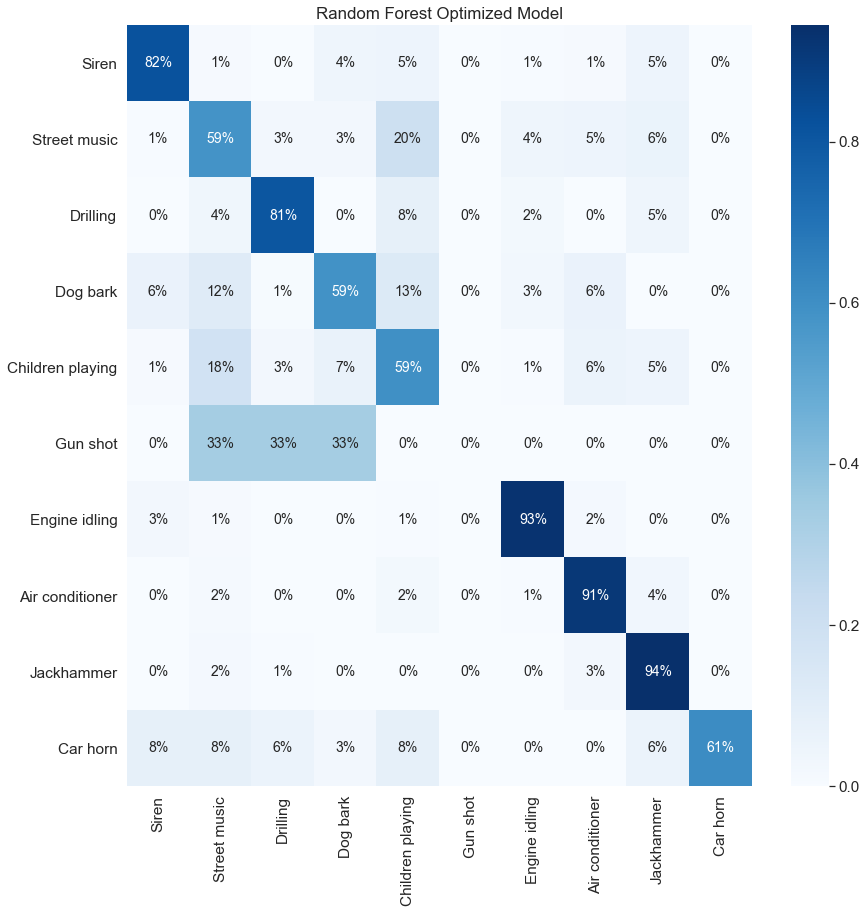

In [52]:
# set up random forest
rf_best = RandomForestClassifier(max_depth = 25,n_estimators=2000)
rf_best = rf_best.fit(X_train, y_train)
predictions_best = rf_best.predict(X_test)

thing_best = confusion_matrix(y_test, predictions_best)

thing_best = thing_best.astype('float') / thing_best.sum(axis=1)[:, np.newaxis]

df_cm_best = pd.DataFrame(thing_best, index = [i[1].replace('_', ' ').capitalize() for i in catalog],
                  columns = [i[1].replace('_', ' ').capitalize() for i in catalog])

sn.set(font_scale=1.4)#for label size
plt.figure(figsize = (14,14))
plt.title('Random Forest Optimized Model')
sn.heatmap(df_cm, annot=True,cmap='Blues',annot_kws={"size": 14}, fmt='.0%')# font size
plt.savefig('heatmap_best.png')

Shape of ps is: (128, 128)


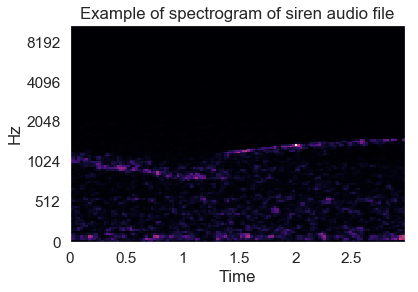

In [49]:
#print spectrogram example
import librosa.display
y, sr = librosa.load('train/train/43.wav', duration=2.97)
ps_1=librosa.feature.melspectrogram(y=y, sr=sr)
shape_of_ps_1=ps_1.shape
print('Shape of ps is:',shape_of_ps_1)
#display the spectrogram 
librosa.display.specshow(ps_1, y_axis='mel',x_axis='time')
plt.title('Example of spectrogram of siren audio file')
plt.savefig('siren.png')
plt.show()

In [53]:
predictions

array([2., 4., 2., ..., 1., 7., 1.])